# Generalized Regression NN
http://neupy.com/apidocs/neupy.algorithms.rbfn.grnn.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='MAINUT5068DCQGJ9',output_format='pandas')
# Get json object with the intraday data and another with  the call's metadata



# get all available daily data (Netflix)
mydata, meta_data = ts.get_daily('NFLX',outputsize='full')

Text(0.5,0,'Date')

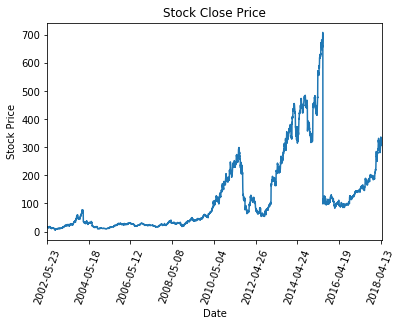

In [3]:
#data.head()
mydata['4. close'].plot()
plt.xticks(rotation=70)
plt.title('Stock Close Price')
plt.ylabel('Stock Price')
plt.xlabel('Date')

In [4]:
dataset = mydata['4. close'].loc['2006-04-26':'2008-04-26'].values
dataset = dataset.astype('float32')

In [5]:
preproc = input("What Preprocessing do you like? None (N), Differencing (D) or Moving Average (M): ")
print("You chose: ", preproc)
#type(preproc)

What Preprocessing do you like? None (N), Differencing (D) or Moving Average (M): N
You chose:  N


In [6]:
if preproc == 'D':
    dataset = np.diff(dataset)
    print('Differencing applied')
elif preproc == 'M':
    cumsum = np.cumsum(np.insert(dataset, 0, 0)) 
    dataset = (cumsum[5:] - cumsum[:-5]) / float(5)
    print('Moving Average applied')
else:
    dataset = dataset
    print('no preprocessing applied')

no preprocessing applied


In [7]:
from sklearn import preprocessing

preprocessing.minmax_scale(dataset);

In [8]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

337 167


In [9]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [10]:
look_back = input("How many days in the past do you want to use as feature vector? ")
print("You chose: ", look_back)

How many days in the past do you want to use as feature vector? 2
You chose:  2


In [11]:
look_back = int(look_back)
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

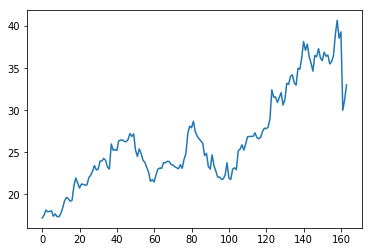

In [12]:
plt.plot(testY)

In [13]:
from neupy import algorithms, estimators, environment

In [14]:
environment.reproducible()

In [15]:
nw = algorithms.GRNN(std=0.1, verbose=False)

In [16]:
nw.train(trainX, trainY)

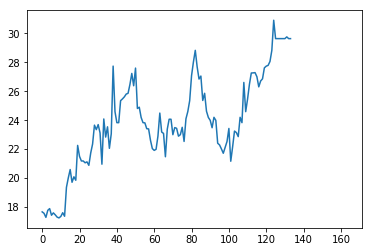

In [17]:
testPredict = nw.predict(testX)
trainPredict = nw.predict(trainX)
plt.plot(testPredict)

In [18]:
estimators.rmse(testPredict, testY)

nan

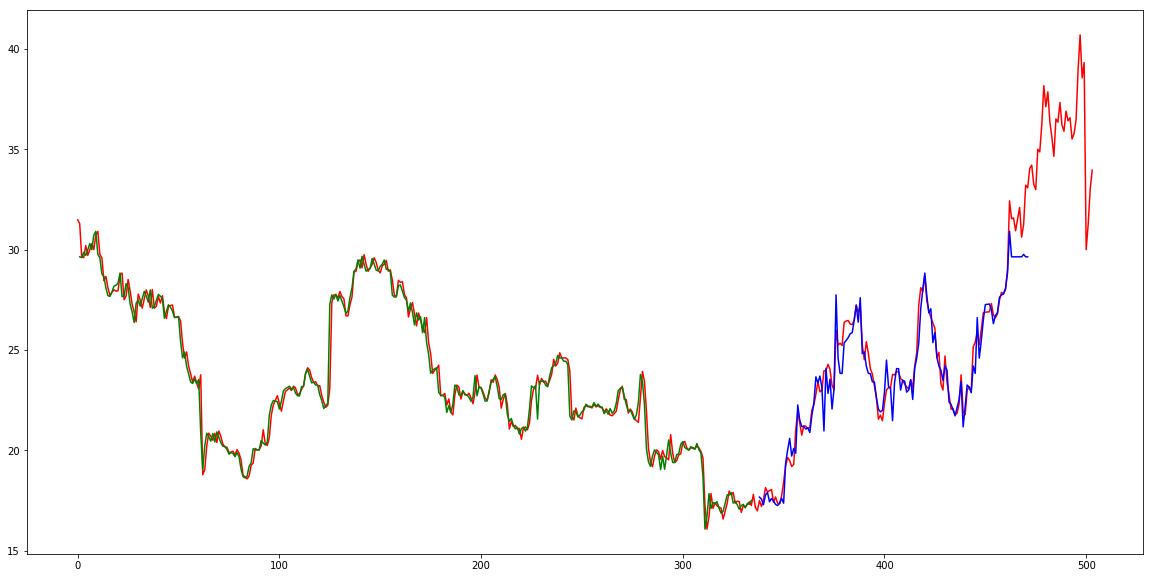

In [21]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back-1:len(trainPredict)+look_back-1] = trainPredict[:,0]

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset)-2] = testPredict[:,0]

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(dataset,'r')
plt.plot(trainPredictPlot,'g')
plt.plot(testPredictPlot,'b')
plt.show()